In [1]:
%matplotlib inline 
import multiprocessing
import time

import numpy as np
import scipy
from scipy.ndimage.filters import gaussian_filter
import scipy.spatial
import glob
from matplotlib import pyplot as plt
import json
from PIL import ImageDraw, Image

from glob import glob

import matplotlib

from tqdm import tqdm

import density_filter

# Add base path to import dir for importing datasets
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

In [6]:
from datasets import shanghaitech, fudan
frames_list = []
# for base_path in glob('../data/ShanghaiTech/part_*/*'):
#     frames_list = frames_list + shanghaitech.load_all_frames(base_path)
#     break
    
for base_path in glob('../data/Fudan/*_data'):
    frames_list = frames_list + fudan.load_all_frames(base_path)
    break

f = None
for frame in frames_list[1:2]:
    f = frame
    break

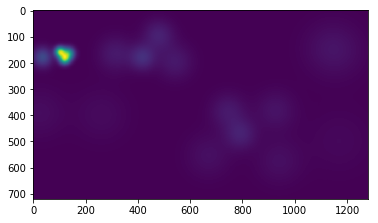

In [11]:
k = density_filter.gaussian_filter_density(f)
from matplotlib import pyplot as plt
plt.imshow(k, interpolation='nearest')
plt.show()

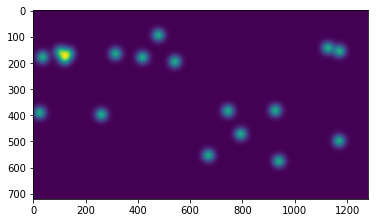

In [12]:
from scipy.ndimage.filters import gaussian_filter
def gaussian_filter_fixed_density(frame, sigma = 16):
    img = plt.imread(frame.get_image_path())
    img_shape = [img.shape[0], img.shape[1]]

    density = np.zeros(img_shape, dtype=np.float32)
    for dot in frame.get_centers():
        if dot[1] >= img.shape[0] or dot[1] < 0 or dot[0] >= img.shape[1] or dot[0] < 0:
            continue
        density[dot[1], dot[0]] = 1
    
    density = gaussian_filter(density, sigma, mode='constant')
    return density

k = gaussian_filter_fixed_density(f)
from matplotlib import pyplot as plt
plt.imshow(k, interpolation='nearest')
plt.show()

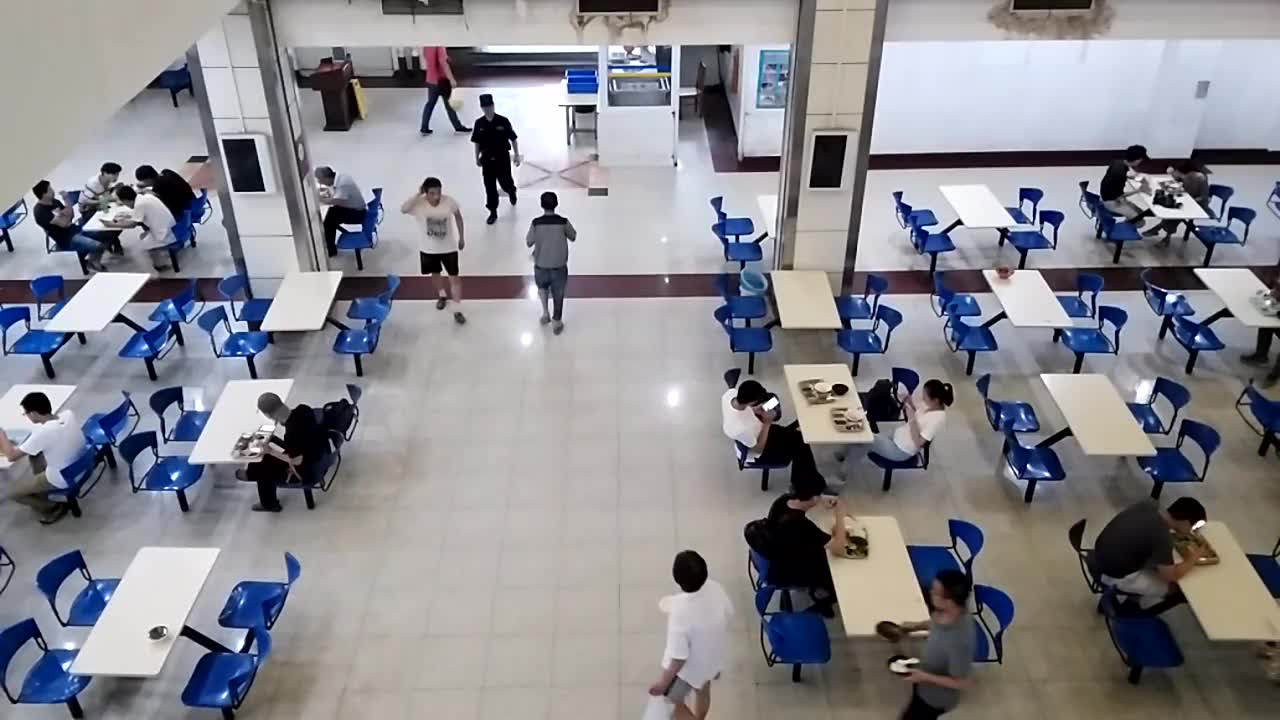

In [13]:
f.get_image()